In [4]:
# Importing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [5]:
zoo = pd.read_csv('C:/Users/admin/Downloads/animal_DB/zoo.csv')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
class_types = pd.read_csv('C:/Users/admin/Downloads/animal_DB/class.csv')
class_types.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


{'Mammal': 41, 'Bird': 20, 'Reptile': 5, 'Fish': 13, 'Amphibian': 4, 'Bug': 8, 'Invertebrate': 10}


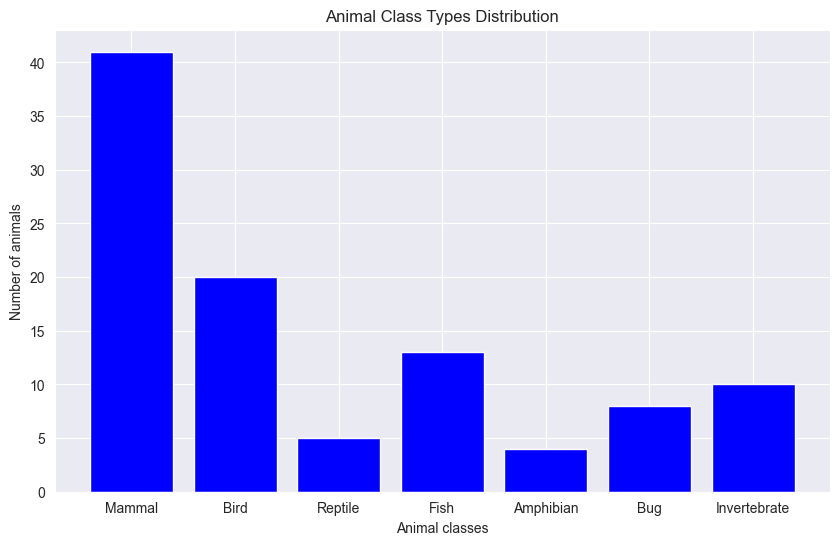

In [4]:
# counting and visualizing animal class types 

animal_classes = class_types.iloc[:,2]
n_of_animals = class_types.iloc[:,1]

animals_distribution = dict(zip(animal_classes, n_of_animals))
print(animals_distribution)

plt.figure(figsize=(10, 6)) #width of 10 inches and a height of 6 inches
plt.bar(animal_classes, n_of_animals, color='blue')
plt.xlabel('Animal classes')
plt.ylabel('Number of animals')
plt.title('Animal Class Types Distribution')
plt.show()

In [5]:
df=pd.merge(zoo,class_types,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [7]:
# Splitting data into training set and testing set

X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label
    
    
X.head()
Y.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
#test size is pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code scikitlearn recommend ( random_state=42)
#the stratify parameter splits the dataset in a way that the proportion of values in the sample will be the same as the proportion provided with this parameter.

In [7]:
print(X_train)

    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
86     0         0     1     0         0        1         1        1   
99     0         0     1     0         0        0         0        0   
20     0         1     1     0         1        0         0        0   
41     0         1     1     0         0        0         1        0   
64     1         0     0     1         0        0         1        1   
..   ...       ...   ...   ...       ...      ...       ...      ...   
66     0         0     0     1         0        1         1        1   
15     0         0     1     0         0        1         1        0   
62     0         0     1     0         0        0         1        1   
32     1         0     0     1         0        0         0        1   
57     0         1     1     0         1        0         0        0   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
86         1         0         1     1     0     1         0   

In [8]:
print(Y_train)

86    4
99    7
20    2
41    2
64    1
     ..
66    1
15    7
62    3
32    1
57    2
Name: class_type, Length: 70, dtype: int64


In [9]:
print(X_test)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
100     0         1     1     0         1        0         0        0   
58      0         1     1     0         0        1         1        0   
43      0         1     1     0         1        0         0        0   
21      0         1     1     0         1        1         0        0   
10      1         0     0     1         0        0         1        1   
40      1         0     1     0         1        0         0        0   
50      1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
87      0         1     1     0         1        1         0        0   
80      0         0     1     0         0        0         1        1   
70      1         0     0     1         0        0         0        1   
37      0         1     1     0         1        0         1        0   
7       0         0     1     0         0        1 

In [10]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


In [11]:
## feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[-0.81649658 -0.5         0.81649658 ...  0.63245553 -0.38411064
   1.15470054]
 [-0.81649658 -0.5         0.81649658 ... -1.58113883 -0.38411064
  -0.8660254 ]
 [-0.81649658  2.          0.81649658 ...  0.63245553  2.60341656
  -0.8660254 ]
 ...
 [-0.81649658 -0.5         0.81649658 ...  0.63245553 -0.38411064
  -0.8660254 ]
 [ 1.22474487 -0.5        -1.22474487 ... -1.58113883 -0.38411064
   1.15470054]
 [-0.81649658  2.          0.81649658 ...  0.63245553  2.60341656
  -0.8660254 ]]


In [13]:
print(X_test)

[[-0.81649658  2.          0.81649658 -0.81649658  1.83711731 -0.72231512
  -1.15470054 -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064 -0.8660254 ]
 [-0.81649658  2.          0.81649658 -0.81649658 -0.54433105  1.38443731
   0.8660254  -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064  1.15470054]
 [-0.81649658  2.          0.81649658 -0.81649658  1.83711731 -0.72231512
  -1.15470054 -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064 -0.8660254 ]
 [-0.81649658  2.          0.81649658 -0.81649658  1.83711731  1.38443731
  -1.15470054 -1.18903032  0.47756693  0.47756693 -0.30618622 -0.47756693
  -0.41606078  0.63245553 -0.38411064 -0.8660254 ]
 [ 1.22474487 -0.5        -1.22474487  1.22474487 -0.54433105 -0.72231512
   0.8660254   0.84102145  0.47756693  0.47756693 -0.30618622 -0.47756693
   0.57120208  0.63245553 -0.38411064  1.15470054]
 [ 1.

In [14]:
#KNN 
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [15]:
##predicting a new result
Y_pred_knn = classifier_knn.predict(X_test)
print(Y_pred_knn)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [16]:
print(Y_test)


100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


In [17]:
#comparing results with np.intersect1d
#print(len(np.intersect1d(Y_pred, Y_test)/len(Y_pred))
#print(np.concatenate(Y_pred, Y_test))

In [18]:
##accuracy KNN
print("Test Accuracy : ",classifier_knn.score(X_test,Y_test))
print("Train Accuracy : ",classifier_knn.score(X_train,Y_train))
#when  calculating the accuracy, take the argmax over the second dimension (i.e. the number of classes) to get the actual and predicted class before calling accuracy_score.

Test Accuracy :  0.967741935483871
Train Accuracy :  0.9714285714285714


In [43]:
tmp_knn = pd.DataFrame(zoo)
pred_knn = pd.DataFrame(Y_pred_knn,dtype=int, index=Y_test.index)
tmp_knn['prediction'] = pred_knn
print(tmp_knn)
print(tmp_knn.shape)

tmp_knn = tmp_knn.dropna()
print(tmp_knn)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [44]:
for i in range(tmp_knn.shape[0]):
    if tmp_knn.iloc[i][17] != tmp_knn.iloc[i][18]:
        print('  '+str(tmp_knn.iloc[i][0]))
        print('class type: '+str(tmp_knn.iloc[i][17]))
        print('prediction: '+str(tmp_knn.iloc[i][18]))

  seasnake
class type: 3
prediction: 4.0


C:\Users\admin\AppData\Local\Temp\ipykernel_15852\1949419264.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_knn.iloc[i][17] != tmp_knn.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\1949419264.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_knn.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\1949419264.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class t

In [46]:
#Decision tree classification
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(70, 16) (31, 16) (70,) (31,)


In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [53]:
## predictions
y_pred_tree = classifier_dt.predict(X_test)
print(y_pred_tree)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 5 7 1 7 6 1]


In [54]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


In [51]:
##accuracy Decision Tree
print("Test Accuracy : ",classifier_dt.score(X_test,Y_test))
print("Train Accuracy : ",classifier_dt.score(X_train,Y_train))

Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


In [57]:
## compare the predictions with the real values (after fixing)
tmp_tree = pd.DataFrame(zoo)
pred_dt = pd.DataFrame(y_pred_tree,dtype=int, index=Y_test.index)
tmp_tree['prediction'] = pred_dt
#print(tmp_tree)
print(tmp_tree.shape)

tmp_tree = tmp_tree.dropna()
print(tmp_tree)

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

In [58]:
for i in range(tmp_tree.shape[0]):
    if tmp_tree.iloc[i][17] != tmp_tree.iloc[i][18]:
        print('  '+str(tmp_tree.iloc[i][0]))
        print('class type: '+str(tmp_tree.iloc[i][17]))
        print('prediction: '+str(tmp_tree.iloc[i][18]))

  seasnake
class type: 3
prediction: 5.0


C:\Users\admin\AppData\Local\Temp\ipykernel_15852\4182168241.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_tree.iloc[i][17] != tmp_tree.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\4182168241.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_tree.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\4182168241.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('clas

In [59]:
#Random forest
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, Y_train)

RandomForestClassifier()

In [69]:
## predictions
y_pred_forest = classifier_RF.predict(X_test[0:31])
print(y_pred_forest)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [70]:
print(Y_test[0:31])

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


In [62]:
#comparing predict and true

In [67]:
##accuracy Random Forest
print("Test Accuracy : ",classifier_RF.score(X_test,Y_test))
print("Train Accuracy : ",classifier_RF.score(X_train,Y_train))

Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


In [71]:

tmp_forest = pd.DataFrame(zoo)
pred_forest = pd.DataFrame(y_pred_forest,dtype=int, index=Y_test.index)
tmp_forest['prediction'] = pred_forest
#print(tmp_tree)
print(tmp_forest.shape)

tmp_forest = tmp_forest.dropna()
print(tmp_forest)

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

In [72]:
for i in range(tmp_forest.shape[0]):
    if tmp_forest.iloc[i][17] != tmp_forest.iloc[i][18]:
        print('  '+str(tmp_forest.iloc[i][0]))
        print('class type: '+str(tmp_forest.iloc[i][17]))
        print('prediction: '+str(tmp_forest.iloc[i][18]))

  seasnake
class type: 3
prediction: 4.0


C:\Users\admin\AppData\Local\Temp\ipykernel_15852\1003261201.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_forest.iloc[i][17] != tmp_forest.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\1003261201.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_forest.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\1003261201.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print

In [73]:
#SVM
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
classifier_svm = svm.SVC()
classifier_svm.fit(X_train, Y_train)

SVC()

In [80]:
## predictions
y_pred_svm = classifier_svm.predict(X_test)
print(y_pred_svm)

[2 2 2 2 1 6 1 1 2 4 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [81]:
print(Y_test)

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


In [82]:
##accuracy SVM
print("Test Accuracy : ",classifier_svm.score(X_test,Y_test))
print("Train Accuracy : ",classifier_svm.score(X_train,Y_train))
# ?train and test have different dimensions

Test Accuracy :  0.9354838709677419
Train Accuracy :  0.9571428571428572


In [84]:
##compare the predictions with the real values (to do for every classifier after fixing)
tmp_svm = pd.DataFrame(zoo)
pred_svm = pd.DataFrame(y_pred_svm,dtype=int, index=Y_test.index)
tmp_svm['prediction'] = pred_svm
#print(tmp_tree)
print(tmp_svm.shape)

tmp_svm = tmp_svm.dropna()
print(tmp_svm)
for i in range(tmp_svm.shape[0]):
    if tmp_svm.iloc[i][17] != tmp_svm.iloc[i][18]:
        print('  '+str(tmp_svm.iloc[i][0]))
        print('class type: '+str(tmp_svm.iloc[i][17]))
        print('prediction: '+str(tmp_svm.iloc[i][18]))

(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

C:\Users\admin\AppData\Local\Temp\ipykernel_15852\2145587894.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_svm.iloc[i][17] != tmp_svm.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\2145587894.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_svm.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\2145587894.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('clas

In [85]:
#Naive Bayes
X = zoo.iloc[:, 1:17]  # only the features 
Y = zoo.iloc[:, 17]    #only the label

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB()

In [87]:
## predictions
y_pred_NB = classifier_nb.predict(X_test[0:31]) 
print(y_pred_NB)

[2 2 2 2 1 6 1 1 2 3 1 2 4 1 7 4 1 1 1 5 4 1 1 4 1 4 7 1 7 6 1]


In [88]:
print(Y_test[0:31])

100    2
58     2
43     2
21     2
10     1
40     6
50     1
4      1
87     2
80     3
70     1
37     2
7      4
44     1
53     7
60     4
84     1
47     1
94     1
89     5
92     4
93     1
49     1
12     4
31     1
76     3
77     7
65     1
14     7
51     6
22     1
Name: class_type, dtype: int64


In [90]:
##accuracy NB
print("Test Accuracy : ",classifier_nb.score(X_test,Y_test))
print("Train Accuracy : ",classifier_nb.score(X_train,Y_train))
# ?train and test have different dimensions

Test Accuracy :  0.967741935483871
Train Accuracy :  1.0


In [89]:
##compare the predictions with the real values 
tmp_NB = pd.DataFrame(zoo)
pred_NB = pd.DataFrame(y_pred_NB,dtype=int, index=Y_test.index)
tmp_NB['prediction'] = pred_NB
#print(tmp_tree)
print(tmp_NB.shape)

tmp_NB = tmp_NB.dropna()
print(tmp_NB)
for i in range(tmp_NB.shape[0]):
    if tmp_NB.iloc[i][17] != tmp_NB.iloc[i][18]:
        print('  '+str(tmp_NB.iloc[i][0]))
        print('class type: '+str(tmp_NB.iloc[i][17]))
        print('prediction: '+str(tmp_NB.iloc[i][18]))
        


(101, 19)
    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
4          boar     1         0     0     1         0        0         1   
7          carp     0         0     1     0         0        1         0   
10      cheetah     1         0     0     1         0        0         1   
12         chub     0         0     1     0         0        1         1   
14         crab     0         0     1     0         0        1         1   
21         duck     0         1     1     0         1        1         0   
22     elephant     1         0     0     1         0        0         0   
31         goat     1         0     0     1         0        0         0   
37         hawk     0         1     1     0         1        0         1   
40     housefly     1         0     1     0         1        0         0   
43         lark     0         1     1     0         1        0         0   
44      leopard     1         0     0     1         0        0         1   
47

C:\Users\admin\AppData\Local\Temp\ipykernel_15852\562972501.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tmp_NB.iloc[i][17] != tmp_NB.iloc[i][18]:
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\562972501.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  '+str(tmp_NB.iloc[i][0]))
C:\Users\admin\AppData\Local\Temp\ipykernel_15852\562972501.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class type

In [ ]:
#comparing algorithms

In [91]:
#algorithm comparison

algorithms = pd.DataFrame({
    'Model': ["K Neighbors", "Decision Tree",
     "Random Forest", "SVM ", "Naive Bayes"],
    'Score': [classifier_knn.score(X_test,Y_test),
     classifier_dt.score(X_test,Y_test),
     classifier_RF.score(X_test,Y_test),
     classifier_svm.score(X_test,Y_test), 
     classifier_nb.score(X_test,Y_test)]})

algorithms.sort_values(by='Score', ascending=False)

# TO FIX: X was fitted without feature name 


C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\admin\.pyenv\pyenv-win\versions\3.12.0rc3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,Model,Score
2,Random Forest,0.967742
4,Naive Bayes,0.967742
3,SVM,0.935484
1,Decision Tree,0.806452
0,K Neighbors,0.741935


<Axes: title={'center': 'Correlation matrix'}>

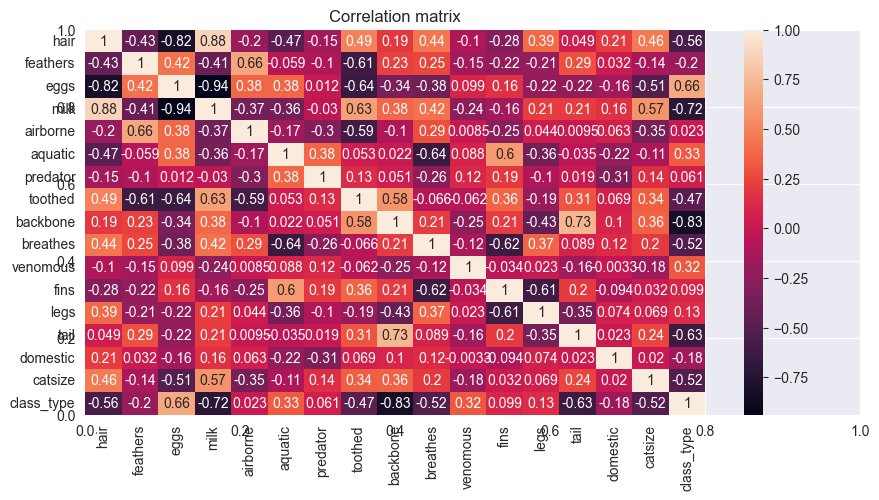

In [95]:
#correlation analysis
plt.subplots(figsize=(10,5)) # 1000x500 with 3 Axes
ax = plt.axes()
ax.set_title('Correlation matrix')
corr = zoo.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)


In [ ]:
#which feature(s) are relevant to efficiently classify the animals?
# if there is milk then the animal is mammal; if there are feathers then it should be bird, if it has a backbone it is definetely not a bug or invertebrate, if it breathes it is not a fish, if it has fins it is a fish...
corr[corr != 1][abs(corr)> 0.65].dropna(how='all', axis=1).dropna(how='all', axis=0)
print(df)
print(df.groupby('Class_Type').mean())#how to transform an object into a numerical value??

In [ ]:
# PROJECT GOALS!!!:
#Comparing the result of each algorithm, show which clustering algorithm better approximates the classes provided by the dataset.

#It is therefore required not only to define a methodology for comparing the clustering results with the expected classification, but also to briefly describe the distinguishing characteristics of each species cluster produced by the algorithm under evaluation.

In [132]:
#K means clustering but without scikit-learn
#Once we have defined which characteristics distinguish each species we can approximate them into the 7 clusters. Following the intuition of the K means clustering algorithm, which is to assign each observation (animal features in our case) to the cluster with the nearest mean.
#Step 1: Choose the number of clusters k
#Step 2: Select k random points from the data as centroids
#Step 3: Assign all the points to the closest cluster centroid
#Step 4: Recompute the centroids of newly formed clusters
#Step 5: Repeat steps 3 and 4


In [8]:
x = zoo.iloc[:, 1:17]
x.head()
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
print(x_train)

[[-0.81649658 -0.5         0.81649658 ...  0.63245553 -0.38411064
   1.15470054]
 [-0.81649658 -0.5         0.81649658 ... -1.58113883 -0.38411064
  -0.8660254 ]
 [-0.81649658  2.          0.81649658 ...  0.63245553  2.60341656
  -0.8660254 ]
 ...
 [-0.81649658 -0.5         0.81649658 ...  0.63245553 -0.38411064
  -0.8660254 ]
 [ 1.22474487 -0.5        -1.22474487 ... -1.58113883 -0.38411064
   1.15470054]
 [-0.81649658  2.          0.81649658 ...  0.63245553  2.60341656
  -0.8660254 ]]


In [ ]:
clusters = len(np.unique(y))
print(clusters)

In [ ]:
centers = 7
x_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42) #import make_blobs
x_train = StandardScaler().fit_transform(x_train)

n_features = 
sample = zoo['animal_name']

def _euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)


class KMeans:
    def __init__(self, K=7, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        
        self.clusters = [[] for _ in range(self.K)] #for each cluster we put an empty list of sample indexes for each cluster
        self.centroids = [] #the centers(mean) for each cluster
    def predict(self, x): #no y because unsupervised
        self.x = x
        self.n_samples, self.n_features = x.shape
        
    #initialize
    sample_idxs np.random.choice(self.n_samples, self.K) #k different samples
    self.centroids = [self.x[idx] for idx in sample_idxs ] #initial centroid
    
    #optimize clusters
    for _ in range(self.max_iters):
        #assign samples to the closest centroids (create the clusters)
        self.clusters = self._create_clusters(self.centroids)
        
        if self.plot_steps:
            self.plot()
            
       #calculate new centroids from the clusters
       centroids_old = self.centroids
       self.centroids = self._get_centroids(self.clusters)
      
       if self._is_converged(centroids_old, self.centroids):
           break
        
       if self.plot_steps:
            self.plot()
        
    #classify samples as the indexes of their clusters
    return self._get_cluster_labels(self.clusters)



def _create_clusters(self, centroids):
    #assign samples to the closest centroids
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.x):
        centroid_idx = self._closest_centroid(sample, centroids)
        clusters[centroid_idx].append(idx)
    return clusters

def _closest_centroid(self, sample, centroids):
    #distance of current sample to each centrois
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx
    

def _get_centroids(self, clusters):
    #assign the mean of the clusters to centroids
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(self.x[cluster], axis=0)#for each cluster we calculate the mean 
        centroids[cluster_idx] = cluster_mean #then we assign to the centroid
        return centroids
        

def _is_converged(self, centroids_old, centroids):
    #distances between old and new centroids for all centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i] for i in range(self.K)]
    return sum(distances) == 0 #when there is no more change so it converges

def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))
    
    for i, index in enumerate(self.clusters):
        point = self.x[index].T
        ax.scatter(*point)
    for point in self.centroids:
        ax.scatter(*point, marker='c', color='black', linewidth=2)
        
    plt.show()    

def _get_cluster_labels(self, clusters):
    #each sample will get the label of the assigned cluster
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters): #we have a list of indexes for clusters
        for sample_idx in cluster:
            labels[sample_idx] = cluster_idx
        
        return labels
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(x_train)
